# Final Assignment: Relationship between On-board Service and Customer Satisfaction

Load data and important packages. I'm using the Invistico_Airline.csv from Kaggle.

In [8]:
# Standard operational package imports.
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels


In [2]:
df_original = pd.read_csv("/Users/omibrown/Downloads/Invistico_Airline.csv")
df_original.head(n = 10)


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


Starting EDA. Looking at datatypes, nulls and the satisfaction columns

In [3]:
print(df_original.dtypes)
df_original['satisfaction'].value_counts(dropna = False)
df_original.isnull().sum()

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [12]:
df_subset = df_original.dropna(axis=0).reset_index(drop = True)
df_subset = df_subset.astype({"On-board service": float})
df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()
df_subset.head(10)


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3.0,0,3,5,3,2,0,0.0
1,1.0,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4.0,4,4,2,3,2,310,305.0
2,1.0,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3.0,3,4,4,4,2,0,0.0
3,1.0,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1.0,0,1,4,1,3,0,0.0
4,1.0,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2.0,0,2,4,2,5,0,0.0
5,1.0,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5.0,4,5,5,4,2,0,0.0
6,1.0,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5.0,0,5,5,5,3,17,15.0
7,1.0,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3.0,3,4,5,4,2,0,0.0
8,1.0,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4.0,0,1,5,4,4,0,0.0
9,1.0,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2.0,4,5,3,4,2,30,26.0


Training and Test Data Splitting

In [5]:
X = df_subset[["On-board service"]]
y = df_subset["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Build the Logistic Regression Model and showcase coeffecient and intercept

In [6]:
clf = LogisticRegression().fit(X_train,y_train)
print(clf.coef_[0])
print(clf.intercept_[0])


[0.60679278]
-1.8996391792356675


Sigmoid Function

<Axes: xlabel='On-board service', ylabel='satisfaction'>

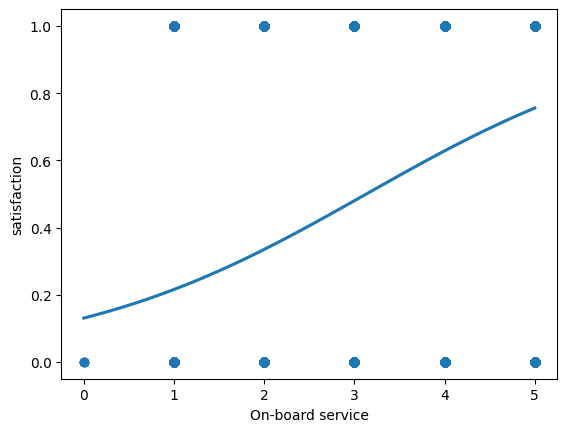

In [7]:
sns.regplot(x="On-board service", y="satisfaction", data=df_subset, logistic=True, ci=None)

As the "on-board service" score increases, the predicted probability of satisfaction also increases in a non-linear fashion, consistent with the sigmoid shape of logistic regression.

For lower "on-board service" values (0–2), the model predicts dissatisfaction strongly, with probabilities closer to 0. For higher values (4–5), the predicted probabilities approach 1, indicating high satisfaction. At intermediate levels of "on-board service" (around 3), the model shows more uncertainty, with predicted probabilities hovering around 0.5. This trend demonstrates that higher "on-board service" scores correlate with higher probabilities of satisfaction, suggesting that "on-board service" is a meaningful predictor in the model.

The separation of data points along 0 and 1 confirms this is a binary classification problem, while the sigmoid curve smooths these extremes into probabilities. The model captures the general relationship between the predictor and the outcome well. However, the assumption of a smooth, monotonic relationship may oversimplify real-world dynamics.

In [18]:
y_pred = clf.predict(X_test)
print(y_pred)


[1. 0. 0. ... 1. 1. 1.]


In [19]:
clf.predict_proba(X_test)

array([[0.3710927 , 0.6289073 ],
       [0.51980484, 0.48019516],
       [0.78462858, 0.21537142],
       ...,
       [0.3710927 , 0.6289073 ],
       [0.3710927 , 0.6289073 ],
       [0.3710927 , 0.6289073 ]])

In [20]:
clf.predict(X_test)


array([1., 0., 0., ..., 1., 1., 1.])

In [21]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.672793
Precision: 0.695774
Recall: 0.711948
F1 Score: 0.703768


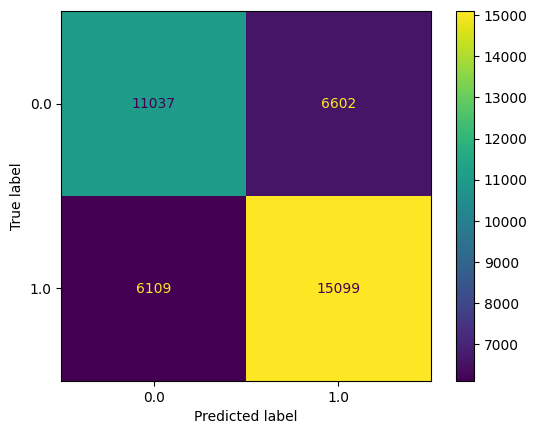

In [22]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

As we can see from our confusion matrix and our accuracy metrics the model could be improved but we would then have to account for additional factors and do more complex analysis.